In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import os

PROJECT_ROOT = "/Users/srs/Desktop/REGIS/MSDS692- DATA SCIENCE PRACTICUM/practicum_1_mood_detection_using_music_recommendation_system"
FIG_DIR = "reports/figures"

os.chdir(PROJECT_ROOT)
print("Working directory set to:", os.getcwd())

Working directory set to: /Users/srs/Desktop/REGIS/MSDS692- DATA SCIENCE PRACTICUM/practicum_1_mood_detection_using_music_recommendation_system


In [18]:
df = pd.read_csv("data/processed/spotify_combined_audio_features.csv")
print(df.shape)
df.head()

(146833, 11)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,source_dataset
0,0.941394,1.096577,1.124668,0.0583,0.1020,0.000000,0.0653,0.140773,0.005845,194754,spotify_dataset_1
1,0.813163,0.673558,0.627369,0.0373,0.0724,0.004210,0.3570,0.829455,-0.746595,162600,spotify_dataset_1
2,0.515902,1.159402,0.954713,0.0742,0.0794,0.000023,0.1100,0.514629,0.073096,176616,spotify_dataset_1
3,0.766534,1.155213,0.881023,0.1020,0.0287,0.000009,0.2040,-0.807640,0.003117,169093,spotify_dataset_1
4,0.370186,0.748948,0.690623,0.0359,0.0803,0.000000,0.0833,0.955385,0.072005,189052,spotify_dataset_1


In [19]:
required_cols = ["valence", "energy"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

df[required_cols].describe()

,valence,energy
count,1.468330e+05,1.468330e+05
mean,-5.543698e-16,5.652094e-17
std,1.000003e+00,1.000003e+00
min,-1.897724e+00,-2.739912e+00
25%,-8.115750e-01,-6.457585e-01
50%,-2.451034e-02,1.751496e-01
75%,8.019076e-01,8.201488e-01
max,2.017923e+00,1.448395e+00


In [20]:
df["valence"] = pd.to_numeric(df["valence"], errors="coerce")
df["energy"] = pd.to_numeric(df["energy"], errors="coerce")
df = df.dropna(subset=["valence", "energy"])

In [22]:
valence_thr = df["valence"].median()
energy_thr = df["energy"].median()

print("Valence threshold (median):", valence_thr)
print("Energy threshold (median):", energy_thr)

Valence threshold (median): -0.0245103434902737
Energy threshold (median): 0.1751495889370505


In [23]:
def assign_mood(v, e, v_thr, e_thr):
    if v >= v_thr and e >= e_thr:
        return "Happy / Energetic"
    elif v >= v_thr and e < e_thr:
        return "Calm / Content"
    elif v < v_thr and e >= e_thr:
        return "Angry / Intense"
    else:
        return "Sad / Melancholic"

df["mood_label"] = df.apply(lambda r: assign_mood(r["valence"], r["energy"], valence_thr, energy_thr), axis=1)
df["mood_label"].value_counts()

mood_label
Happy / Energetic    42564
Sad / Melancholic    42377
Calm / Content       30976
Angry / Intense      30916
Name: count, dtype: int64

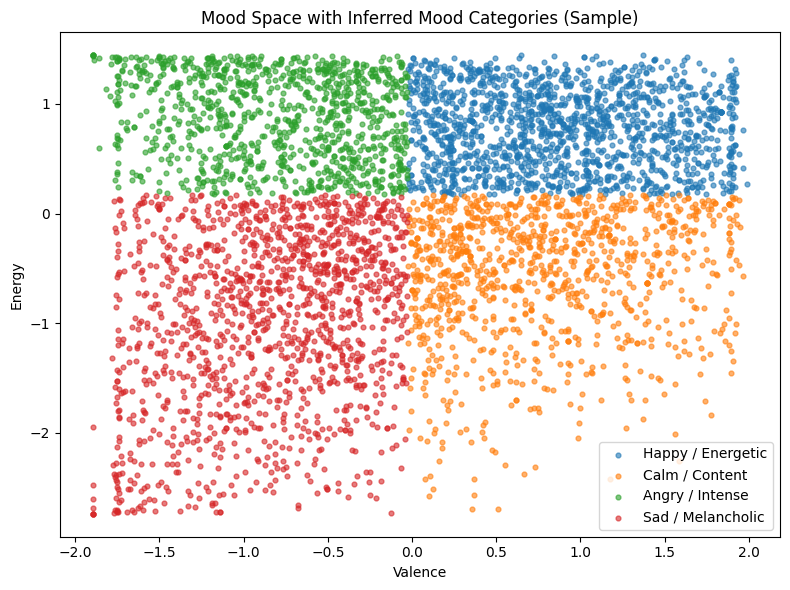

In [27]:
plt.figure(figsize=(8, 6))

for mood in ["Happy / Energetic", "Calm / Content", "Angry / Intense", "Sad / Melancholic"]:
    subset = sample[sample["mood_label"] == mood]
    plt.scatter(subset["valence"], subset["energy"], s=12, alpha=0.6, label=mood)

plt.xlabel("Valence")
plt.ylabel("Energy")
plt.title("Mood Space with Inferred Mood Categories (Sample)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "week3_mood_space_with_labels.png"), dpi=200)
plt.show()

In [28]:
mood_profile_features = ["valence", "energy"]
df[mood_profile_features].head()

,valence,energy
0,0.140773,1.096577
1,0.829455,0.673558
2,0.514629,1.159402
3,-0.807640,1.155213
4,0.955385,0.748948


In [29]:
OUTPUT_PATH = "data/processed/spotify_dataset_with_mood.csv"
df.to_csv(OUTPUT_PATH, index=False)
print("Saved:", OUTPUT_PATH)

Saved: data/processed/spotify_dataset_with_mood.csv
